In [1]:
#invitations to the party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
#import data
data = pd.read_csv("TIGI_new.csv")


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
#extending column view
pd.options.display.max_columns = 183
data.head()

,TIGIID,tigishortid,sampleidfullstudybarcodeset,sampleidpilotstudybarcodesetpilo,sampleidforduplicatebarcodesetqc,dareorotherstudyid,Barcodeid,excluded,excludecode,unitedorothergroupandexclusionre,tigigroup,newtigigroup,tigigroupcode,tigirelaxedsubgroup,tigirelaxedhilo,tigistricthilo,tigidatepilot,tigidate,ageattigi,ageatdm,durationdmattigi,yearofdiagnosis,ageyearsatdm,agemonthsatdm,age19orunderattigi,ethnicgroup,gender,gendercoded,height,weight,bmi,bmicentile,bmiatdiagnosis,bmisdswho,beta2score,hba1c,averagehba1c,sdhba1c,averageacr,gadresult,ia2result,znt8result,gadposneg,ia2posneg,znt8posneg,numberofabs,abpos,initialdiabetestreatment,yearsdiagnosistoinsulin,monthsdiagnosistoinsulin,curinsulin,totalinsulindose,iuperkg,newiuperkg,autoimmunedisease,othercurrentmedcons,aceorarb,currentlytakingstatin,nephropathy,retinopathy,levelofretinopathy,retinopathycoded,levelofretcoded,nephropathycoded,retinalgrade,maculargrade,retpresent,microalbuminuria,niceacr,familyhistoryofdm,mother,matgrandfather,matgrandmother,father,patgrandfather,patgrandmother,noofchildren,childrenwithdiabetes,numberofsiblings,siblingswithdiabetes,yearsbetweenunitedtigi,placeofvisit,serumcpeptigi,cpepbase,batchanalysisdatebase,cpep0,batchanalysisdate0,cpep30,cpep60,cpep90,cpeptidenotes,batchanalysisdate90,cpep120,glubase,glu0,glu30,glu60,glu90,glu120,glucoseincrement,rucpbase,rucrebase,ucpcrbase,rucp120mm,rucre120mm,ucpcr120mm,rucp120home,rucre120home,ucpcr120home,ucpcr120calc,ucpcr120homecalc,pardm,glucagon0min,glucagon90min,glucagonincrement,proinsulin0min,proinsulin90min,proinsincrement,proinsulinincrementbinary,proinsulindetect,cpep90pro90ratio,cpep90plusproinsulin90,diffcpepproins90,proincpepratio,proicpepratioperc,cpepdetect,auccpep,ucpcrdetect,dnaid1,dnaid2,rs2187668,rs7454108,rs10509540,rs11594656,rs11755527,rs1264813,rs12708716,rs12722495,rs1465788,rs17574546,rs1893217,rs1990760,rs2069762,rs2281808,rs2292239,rs2395029,rs2476601,rs3024505,rs3087243,rs3129889,rs3184504,rs333,rs3788013,rs3825932,rs425105,rs478582,rs4788084,rs4948088,rs5753037,rs689,rs7202877,rs763361,rs9388489,DR15,DR3DR4het,dr3dr4,hlagenotypers28749130,t1d_grs,t1d_perc_w,non_t1d_perc_w,t1d_score_9,t1d_score_10,a2yesno,grs1,grs2,clarkescore,goldscore,hypocountsx,hypocountnosx,goldscoreQ1,goldscoreQ2,clarkeawareness,goldawareness
0,TIGI001,1.0,158.0,NaN,NaN,SWPEX4843NA,TG1158002,No,0.0,Pilot. Include in Utd Group,Low Relaxed,0.0,2.0,LR1,0.0,NaN,NaN,10-Feb-16,23.747223,8.000000,15.747222,2000.0,8.0,NaN,False,Any other group,Female,1.0,1.630,71.500000,26.911062,NaN,NaN,1.450648,NaN,70.0,65.0,2.83,NaN,93.500,0.000,0.0,1.0,0.0,0.0,1.0,1.0,Insulin,0.0,0.0,True,30.000000,1.114783,0.419580,NaN,NaN,NaN,False,False,False,NaN,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,False,No,No,No,No,No,No,0.0,0.0,2.0,0.0,NaN,Exeter CRF,2.9,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,28/04/2016,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,0.029,0.9,0.019,0.029,1.5,0.019,0.029,4.9,0.019,0.019000,0.019000,0.0,NaN,1.4,NaN,NaN,0.60,NaN,NaN,1.0,4.833333,1.750000,2.300000,0.206897,20.689655,0.0,NaN,0.0,DARE,SWPEX4843NA,0.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,X/X,T:A,0.241976,8.600000,62.500000,8.604685,0.579848,True,NaN,NaN,1.0,90.0,25.0,2.0,88.0,2.0,1.0,1.0
1,TIGI002,2.0,523.0,2.0,NaN,SWPEX4937AN,TG12523002,No,0.0,Pilot. Include in Utd Group,Low Relaxed,0.0,2.0,LR1,0.0,NaN,NaN,10-Jun-16,59.016666,21.250000,37.766666,1978.0,21.0,3.0,False,White British,Male,0.0,1.868,83.400002,23.900793,NaN,NaN,0.556592,NaN,58.0,50.0,4.25,0.0,212.648,51.765,21.0,1.0,1.0,1.0,3.0,1.0,Insulin,0.0,0.0,True,37.400002,1.564802,0.448441,Other,osteoporosis; hypertension,.a,False,False,True,Background,1.0,1.0,0.0,NaN,NaN,NaN,No,A1,True,Yes,Yes,No,Yes,No,Yes,0.0,0.0,0.0,0.0,NaN,Exeter CRF,2.9,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,22/08/2016,NaN,NaN,NaN,NaN,NaN,30.900000,NaN,NaN,0.029,8.8,0.019,0.029,3.5,0.019,0.029,5.4,0.019,0.019000,0.019000,1.0,NaN,4.6,NaN,NaN,0.29,NaN,NaN,0.0,10.0000

In [5]:
data.shape

(294, 183)

In [6]:
data = data[data["excludecode"]==0] #ask Lauric

In [7]:

data = data.dropna(subset=["cpep90"])

In [8]:
#dropping variables which are not important + 100% missing values
data.drop(["cpep90plusproinsulin90", "diffcpepproins90", "cpep120", "auccpep", "cpep60", "cpep30", "cpep0", "cpepbase", "ucpcr120calc", "bmicentile", "tigidatepilot"], axis=1, inplace=True)

In [9]:
pd.options.display.max_columns = 172
data.head()

,TIGIID,tigishortid,sampleidfullstudybarcodeset,sampleidpilotstudybarcodesetpilo,sampleidforduplicatebarcodesetqc,dareorotherstudyid,Barcodeid,excluded,excludecode,unitedorothergroupandexclusionre,tigigroup,newtigigroup,tigigroupcode,tigirelaxedsubgroup,tigirelaxedhilo,tigistricthilo,tigidate,ageattigi,ageatdm,durationdmattigi,yearofdiagnosis,ageyearsatdm,agemonthsatdm,age19orunderattigi,ethnicgroup,gender,gendercoded,height,weight,bmi,bmiatdiagnosis,bmisdswho,beta2score,hba1c,averagehba1c,sdhba1c,averageacr,gadresult,ia2result,znt8result,gadposneg,ia2posneg,znt8posneg,numberofabs,abpos,initialdiabetestreatment,yearsdiagnosistoinsulin,monthsdiagnosistoinsulin,curinsulin,totalinsulindose,iuperkg,newiuperkg,autoimmunedisease,othercurrentmedcons,aceorarb,currentlytakingstatin,nephropathy,retinopathy,levelofretinopathy,retinopathycoded,levelofretcoded,nephropathycoded,retinalgrade,maculargrade,retpresent,microalbuminuria,niceacr,familyhistoryofdm,mother,matgrandfather,matgrandmother,father,patgrandfather,patgrandmother,noofchildren,childrenwithdiabetes,numberofsiblings,siblingswithdiabetes,yearsbetweenunitedtigi,placeofvisit,serumcpeptigi,batchanalysisdatebase,batchanalysisdate0,cpep90,cpeptidenotes,batchanalysisdate90,glubase,glu0,glu30,glu60,glu90,glu120,glucoseincrement,rucpbase,rucrebase,ucpcrbase,rucp120mm,rucre120mm,ucpcr120mm,rucp120home,rucre120home,ucpcr120home,ucpcr120homecalc,pardm,glucagon0min,glucagon90min,glucagonincrement,proinsulin0min,proinsulin90min,proinsincrement,proinsulinincrementbinary,proinsulindetect,cpep90pro90ratio,proincpepratio,proicpepratioperc,cpepdetect,ucpcrdetect,dnaid1,dnaid2,rs2187668,rs7454108,rs10509540,rs11594656,rs11755527,rs1264813,rs12708716,rs12722495,rs1465788,rs17574546,rs1893217,rs1990760,rs2069762,rs2281808,rs2292239,rs2395029,rs2476601,rs3024505,rs3087243,rs3129889,rs3184504,rs333,rs3788013,rs3825932,rs425105,rs478582,rs4788084,rs4948088,rs5753037,rs689,rs7202877,rs763361,rs9388489,DR15,DR3DR4het,dr3dr4,hlagenotypers28749130,t1d_grs,t1d_perc_w,non_t1d_perc_w,t1d_score_9,t1d_score_10,a2yesno,grs1,grs2,clarkescore,goldscore,hypocountsx,hypocountnosx,goldscoreQ1,goldscoreQ2,clarkeawareness,goldawareness
0,TIGI001,1.0,158.0,NaN,NaN,SWPEX4843NA,TG1158002,No,0.0,Pilot. Include in Utd Group,Low Relaxed,0.0,2.0,LR1,0.0,NaN,10-Feb-16,23.747223,8.000000,15.747222,2000.0,8.0,NaN,False,Any other group,Female,1.0,1.630,71.500000,26.911062,NaN,1.450648,NaN,70.0,65.0,2.83,NaN,93.500,0.000,0.0,1.0,0.0,0.0,1.0,1.0,Insulin,0.0,0.0,True,30.000000,1.114783,0.419580,NaN,NaN,NaN,False,False,False,NaN,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,False,No,No,No,No,No,No,0.0,0.0,2.0,0.0,NaN,Exeter CRF,2.9,NaN,NaN,2.9,NaN,28/04/2016,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,0.029,0.9,0.019,0.029,1.5,0.019,0.029,4.9,0.019,0.019,0.0,NaN,1.4,NaN,NaN,0.60,NaN,NaN,1.0,4.833333,0.206897,20.689655,0.0,0.0,DARE,SWPEX4843NA,0.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,X/X,T:A,0.241976,8.600000,62.500000,8.604685,0.579848,True,NaN,NaN,1.0,90.0,25.0,2.0,88.0,2.0,1.0,1.0
1,TIGI002,2.0,523.0,2.0,NaN,SWPEX4937AN,TG12523002,No,0.0,Pilot. Include in Utd Group,Low Relaxed,0.0,2.0,LR1,0.0,NaN,10-Jun-16,59.016666,21.250000,37.766666,1978.0,21.0,3.0,False,White British,Male,0.0,1.868,83.400002,23.900793,NaN,0.556592,NaN,58.0,50.0,4.25,0.0,212.648,51.765,21.0,1.0,1.0,1.0,3.0,1.0,Insulin,0.0,0.0,True,37.400002,1.564802,0.448441,Other,osteoporosis; hypertension,.a,False,False,True,Background,1.0,1.0,0.0,NaN,NaN,NaN,No,A1,True,Yes,Yes,No,Yes,No,Yes,0.0,0.0,0.0,0.0,NaN,Exeter CRF,2.9,NaN,NaN,2.9,NaN,22/08/2016,NaN,NaN,NaN,NaN,30.900000,NaN,NaN,0.029,8.8,0.019,0.029,3.5,0.019,0.029,5.4,0.019,0.019,1.0,NaN,4.6,NaN,NaN,0.29,NaN,NaN,0.0,10.000000,0.100000,9.999999,0.0,0.0,DARE,SWPEX4937AN,0.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,DR4/X,T:T,0.271098,37.299999,90.599998,

In [10]:
data.shape

(229, 172)

In [11]:
#percentage of missing values
data.isnull().mean().round(2)*100

TIGIID                               0.0
tigishortid                          0.0
sampleidfullstudybarcodeset          0.0
sampleidpilotstudybarcodesetpilo    98.0
sampleidforduplicatebarcodesetqc    90.0
dareorotherstudyid                  73.0
Barcodeid                            0.0
excluded                             0.0
excludecode                          0.0
unitedorothergroupandexclusionre     0.0
tigigroup                            0.0
newtigigroup                         0.0
tigigroupcode                        0.0
tigirelaxedsubgroup                 53.0
tigirelaxedhilo                      3.0
tigistricthilo                      50.0
tigidate                             0.0
ageattigi                            0.0
ageatdm                              0.0
durationdmattigi                     0.0
yearofdiagnosis                      0.0
ageyearsatdm                         0.0
agemonthsatdm                       17.0
age19orunderattigi                   0.0
ethnicgroup     

In [12]:
#percentage of missing data by order
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head

<bound method NDFrame.head of                                   Total   Percent
sampleidpilotstudybarcodesetpilo    225  0.982533
glubase                             208  0.908297
sampleidforduplicatebarcodesetqc    205  0.895197
cpeptidenotes                       198  0.864629
autoimmunedisease                   190  0.829694
rs333                               183  0.799127
rs3184504                           183  0.799127
rs478582                            183  0.799127
dareorotherstudyid                  168  0.733624
levelofretinopathy                  137  0.598253
aceorarb                            127  0.554585
othercurrentmedcons                 126  0.550218
tigirelaxedsubgroup                 122  0.532751
tigistricthilo                      115  0.502183
beta2score                          108  0.471616
glu60                               107  0.467249
proinsulinincrementbinary           107  0.467249
glucoseincrement                    107  0.467249
glu0                

In [13]:
#cpep90 descriptive statisitcs summary
data["cpep90"].describe()

count    229.000000
mean      63.268559
std      150.292474
min        2.900000
25%        2.900000
50%        2.900000
75%       35.000000
max      927.000000
Name: cpep90, dtype: float64

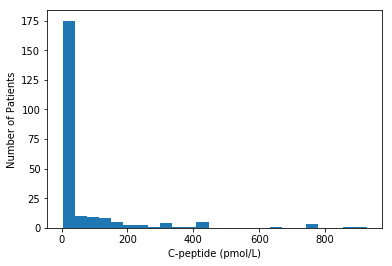

In [14]:
#histogram of cpep90
plt.hist(data["cpep90"], bins=25)
plt.xlabel("C-peptide (pmol/L)")
plt.ylabel("Number of Patients")
plt.savefig("histogram.png")

In [15]:
#skewness and kurtosis
print("Skewness: %f" % data["cpep90"].skew())
print("Kurtosis: %f" % data["cpep90"].kurt())

Skewness: 3.568067
Kurtosis: 13.843008


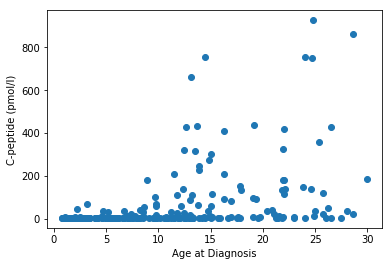

In [16]:
#scatter plot age/cpep90
y = data["cpep90"];
x = data["ageatdm"]
plt.scatter(x,y)
plt.xlabel("Age at Diagnosis")
plt.ylabel("C-peptide (pmol/l)")
plt.savefig('ScatterHR',dpi=300)

Text(0, 0.5, 'Serum C-peptide 90min')

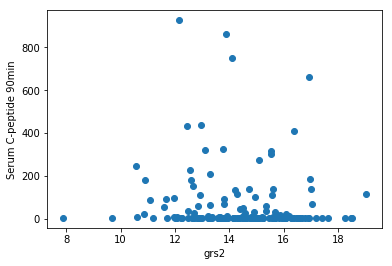

In [17]:
#scatterplot cpep90/grs2
y = data["cpep90"];
x = data["grs2"]
plt.scatter(x,y)
plt.xlabel("grs2")
plt.ylabel("Serum C-peptide 90min")

Text(0, 0.5, 'Serum C-peptide')

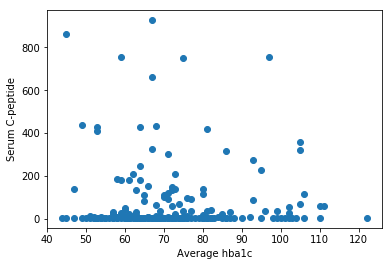

In [18]:
y = data["cpep90"];
x = data["averagehba1c"]
plt.scatter(x,y)
plt.xlabel("Average hba1c")
plt.ylabel("Serum C-peptide")

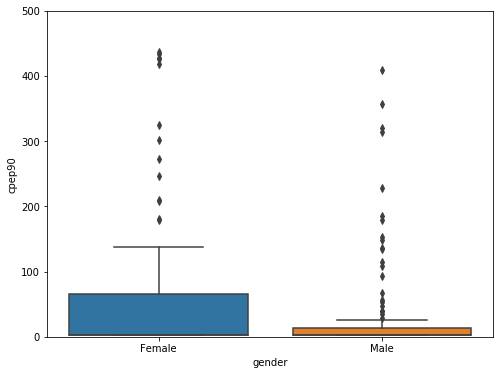

In [19]:
#box plot 
var = 'gender'
databoxplot = pd.concat([data['cpep90'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="cpep90", data=data)
fig.axis(ymin=0, ymax=500);

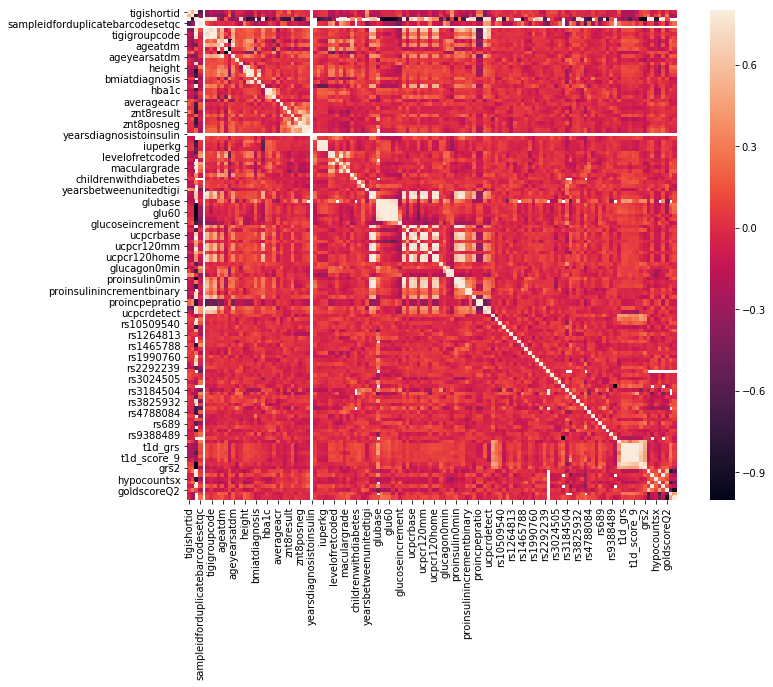

In [20]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [21]:
corrmat

,tigishortid,sampleidfullstudybarcodeset,sampleidpilotstudybarcodesetpilo,sampleidforduplicatebarcodesetqc,excludecode,newtigigroup,tigigroupcode,tigirelaxedhilo,ageattigi,ageatdm,durationdmattigi,yearofdiagnosis,ageyearsatdm,agemonthsatdm,gendercoded,height,weight,bmi,bmiatdiagnosis,bmisdswho,beta2score,hba1c,averagehba1c,sdhba1c,averageacr,gadresult,ia2result,znt8result,gadposneg,ia2posneg,znt8posneg,numberofabs,abpos,yearsdiagnosistoinsulin,monthsdiagnosistoinsulin,totalinsulindose,iuperkg,newiuperkg,retinopathycoded,levelofretcoded,nephropathycoded,retinalgrade,maculargrade,retpresent,noofchildren,childrenwithdiabetes,numberofsiblings,siblingswithdiabetes,yearsbetweenunitedtigi,serumcpeptigi,cpep90,glubase,glu0,glu30,glu60,glu90,glu120,glucoseincrement,rucpbase,rucrebase,ucpcrbase,rucp120mm,rucre120mm,ucpcr120mm,rucp120home,rucre120home,ucpcr120home,ucpcr120homecalc,pardm,glucagon0min,glucagon90min,glucagonincrement,proinsulin0min,proinsulin90min,proinsincrement,proinsulinincrementbinary,proinsulindetect,cpep90pro90ratio,proincpepratio,proicpepratioperc,cpepdetect,ucpcrdetect,rs2187668,rs7454108,rs10509540,rs11594656,rs11755527,rs1264813,rs12708716,rs12722495,rs1465788,rs17574546,rs1893217,rs1990760,rs2069762,rs2281808,rs2292239,rs2395029,rs2476601,rs3024505,rs3087243,rs3129889,rs3184504,rs333,rs3788013,rs3825932,rs425105,rs478582,rs4788084,rs4948088,rs5753037,rs689,rs7202877,rs763361,rs9388489,DR15,DR3DR4het,t1d_grs,t1d_perc_w,non_t1d_perc_w,t1d_score_9,t1d_score_10,grs1,grs2,clarkescore,goldscore,hypocountsx,hypocountnosx,goldscoreQ1,goldscoreQ2,clarkeawareness,goldawareness
tigishortid,1.000000,0.556475,1.000000e+00,-0.592088,NaN,-0.342781,-0.121532,-0.255920,-0.190889,-0.243909,-0.080393,0.128223,-0.247476,-0.026735,-0.026447,-0.112382,-0.209913,-0.202886,0.036376,-0.150702,-0.059963,-0.146522,-0.073851,-0.157974,1.141008e-01,0.152407,-0.012817,0.262112,-0.063573,0.038161,0.038929,0.004788,-0.013611,NaN,-0.070159,-0.020622,0.023662,0.044908,-0.162019,-0.180823,-0.049264,-0.198574,-0.098377,-0.131884,-0.031811,0.045866,-0.147215,-0.140363,0.434473,-0.093097,-0.176789,-0.157763,-0.030554,-0.012176,-0.021789,-0.036522,0.042333,0.064095,-0.107455,-0.009160,-0.191251,-0.181586,-0.096704,-0.196804,-0.175566,-0.024636,-0.197169,-0.184569,-0.011542,-1.213043e-01,0.069852,0.351879,-0.040551,-0.123412,-0.107086,-0.193258,-0.113451,-0.203796,0.222174,0.222174,-0.420378,-0.108502,0.025065,0.074736,0.028407,-0.009314,-0.032234,-0.012217,0.094102,-0.027440,0.093362,0.061009,0.096786,0.031264,0.029929,-0.141666,-0.174061,0.075844,0.132633,0.117207,-0.068893,0.080417,-0.103310,-0.024935,0.047585,-0.012976,-0.012045,-0.021445,-0.062460,0.088206,-0.045065,0.030707,0.014112,-0.102910,-0.052787,-0.080417,0.157889,-0.220700,-0.231960,-0.203590,-0.278458,-0.112181,0.088650,0.135137,0.095035,-0.078899,-0.076738,0.071226,-0.091176,0.072884,-0.104554,-0.030703
sampleidfullstudybarcodeset,0.556475,1.000000,-7.653778e-01,-0.368900,NaN,-0.439581,-0.241839,-0.343948,-0.405443,-0.432025,-0.224722,0.273142,-0.434504,-0.063266,-0.129036,-0.152669,-0.271573,-0.272824,0.072142,-0.142878,0.018647,-0.137239,-0.120266,-0.131085,1.631151e-01,0.037196,0.037364,0.081268,-0.078567,0.139968,0.005935,0.032918,0.004640,NaN,-0.124829,-0.028870,0.031747,0.061148,-0.270509,-0.260579,-0.101899,-0.244018,-0.137914,-0.172564,-0.193884,0.025561,-0.104730,-0.168265,0.334010,-0.218985,-0.261537,-0.209289,-0.073706,-0.023247,-0.013993,-0.024860,0.043326,0.139839,-0.169054,-0.002285,-0.206544,-0.204063,0.022032,-0.248225,-0.211587,-0.053140,-0.231886,-0.217623,0.087716,-2.064131e-01,-0.125774,0.436831,-0.103669,-0.166334,-0.259020,-0.283216,-0.036544,-0.258728,0.365654,0.365654,-0.508176,-0.219563,-0.083853,0.086187,-0.020968,0.024909,-0.021496,0.041686,-0.042483,-0.064604,0.080326,0.177385,0.026470,0.092441,-0.020080,-0.024490,-0.140664,0.074516,0.054702,0.037746,-0.086352,0.033028,0.018072,-0.170445,0.022998,-0.022899,-0.003039,-0.031017,-0.027314,0.064503,-0.030133,-0.0

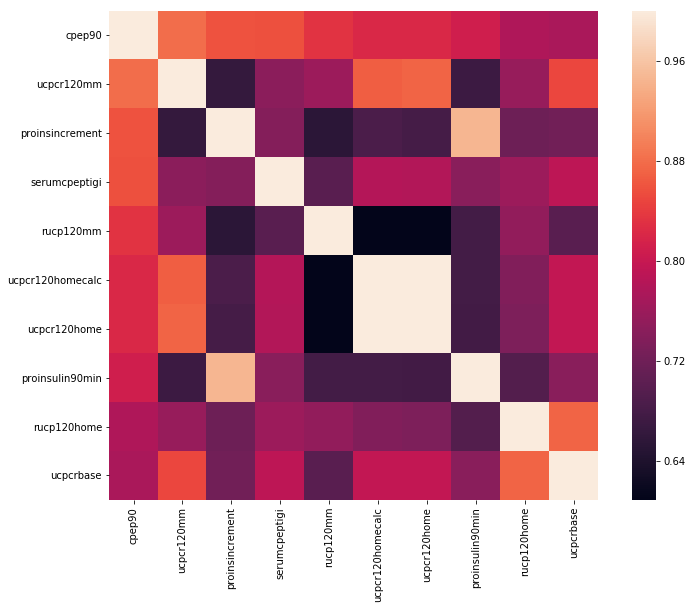

In [22]:
#cpep90 correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'cpep90')['cpep90'].index
dataselected = data[cols]
corrmat = dataselected.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

C:\Users\Goncalo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Goncalo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


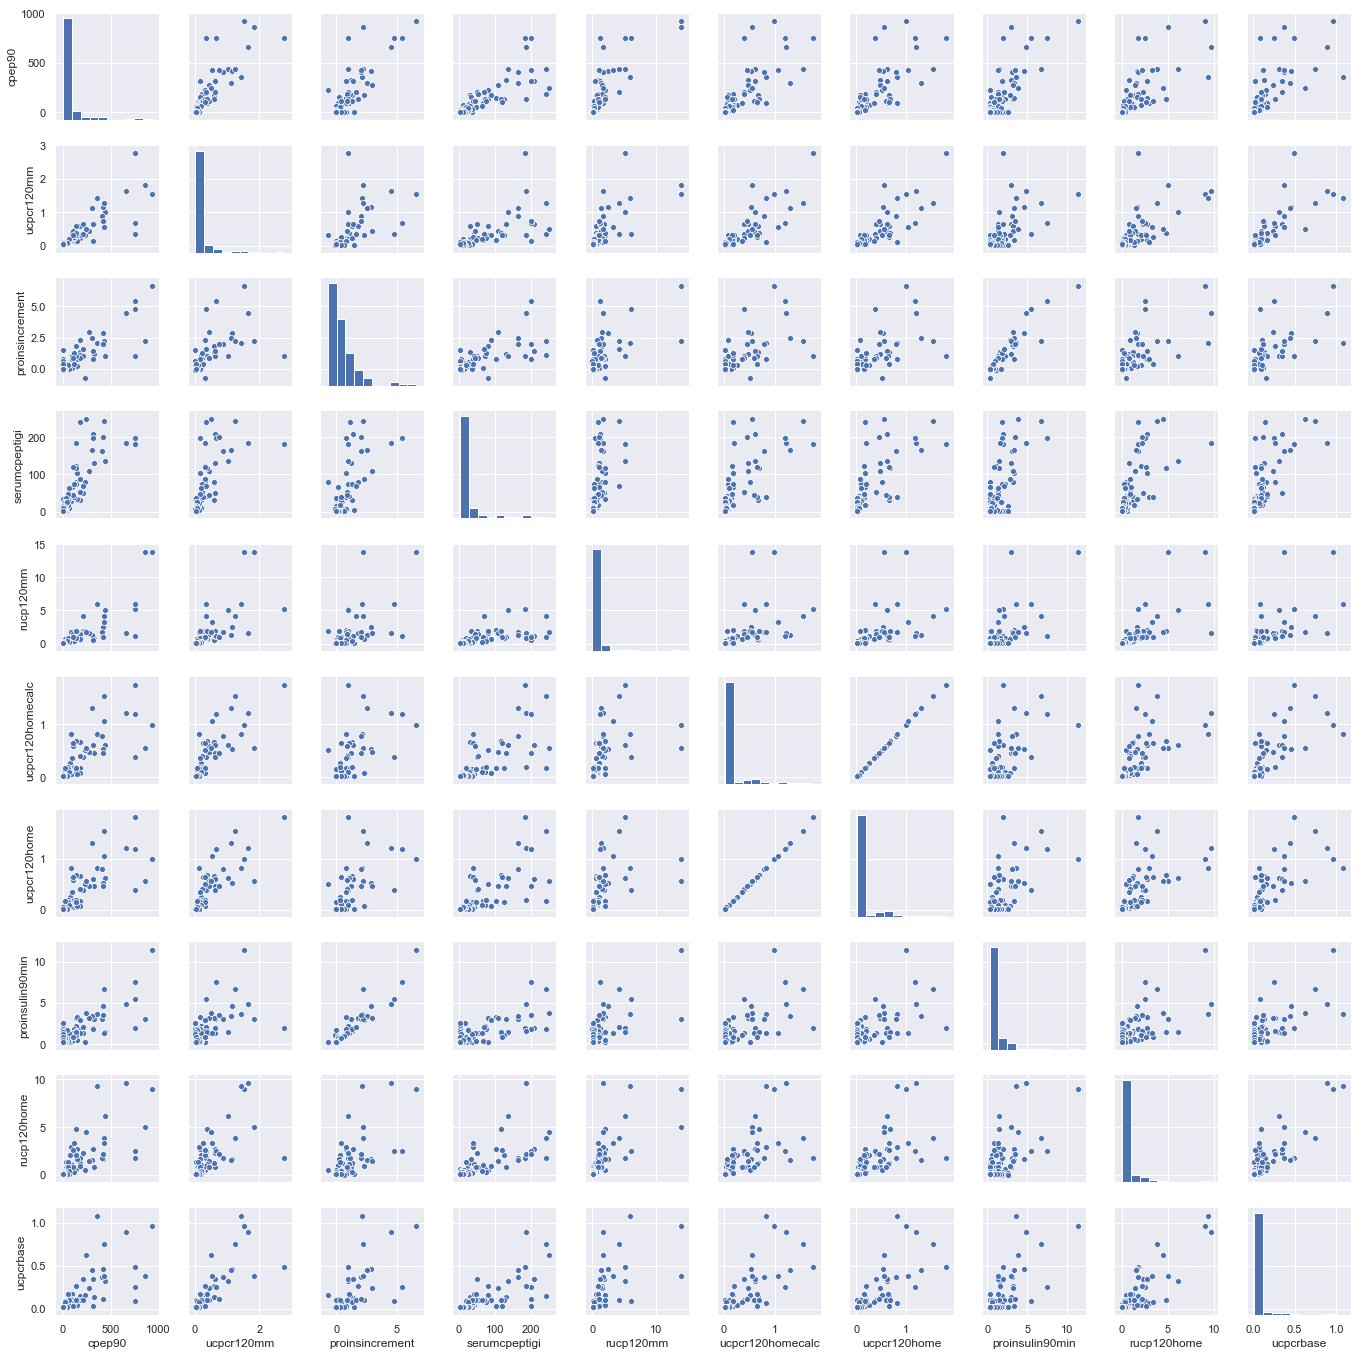

In [23]:
#scatter plot matrix (Quali)
sns.set()
cols = ["cpep90", "ucpcr120mm", "proinsincrement", "serumcpeptigi", "rucp120mm", "ucpcr120homecalc", "ucpcr120home", "proinsulin90min", "rucp120home", "ucpcrbase"]
sns.pairplot(data[cols], size = 1.9)
plt.show()     

In [24]:
#subset with important variables from richard
datasubset = data[["cpep90", "gender", "gadresult", "ia2result", "znt8result", "ageattigi", "ageatdm", "durationdmattigi", "iuperkg", "bmisdswho", "averagehba1c", "t1d_grs", "familyhistoryofdm", "grs1", "grs2"]]
datasubset.head()

,cpep90,gender,gadresult,ia2result,znt8result,ageattigi,ageatdm,durationdmattigi,iuperkg,bmisdswho,averagehba1c,t1d_grs,familyhistoryofdm,grs1,grs2
0,2.9,Female,93.500,0.000,0.0,23.747223,8.000000,15.747222,1.114783,1.450648,65.0,0.241976,False,NaN,NaN
1,2.9,Male,212.648,51.765,21.0,59.016666,21.250000,37.766666,1.564802,0.556592,50.0,0.271098,True,NaN,NaN
3,324.0,Female,0.000,0.000,0.0,49.530556,21.916666,27.613890,1.349714,1.231152,67.0,0.294175,False,17.059999,13.7521
4,756.0,Female,144.800,0.000,0.0,55.919445,24.000000,31.919445,0.826780,0.802923,59.0,0.304296,True,NaN,NaN
6,437.0,Female,12.400,0.000,0.0,56.566666,19.166666,37.400002,1.100586,-0.174720,49.0,0.257755,False,14.592700,12.9513


In [25]:
datasubset.shape

(229, 15)

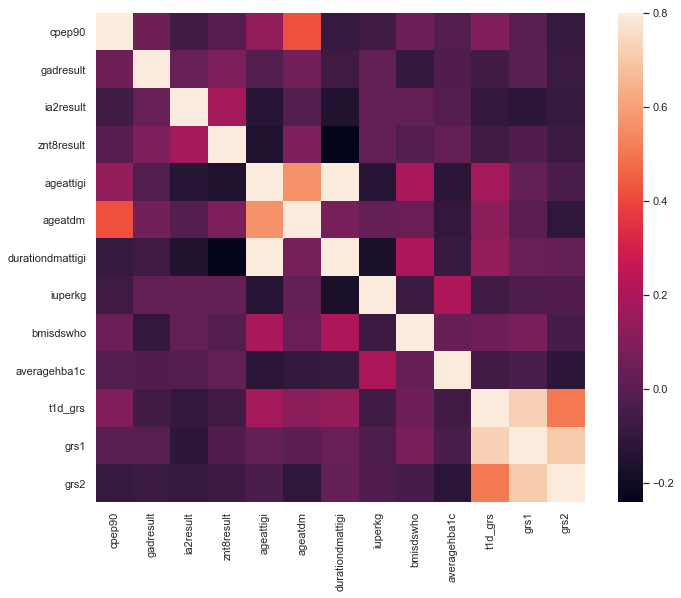

In [26]:
#correlation matrix datasubset
corrmat = datasubset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [27]:
#datasubset correlations
datasubset.corr().head()

,cpep90,gadresult,ia2result,znt8result,ageattigi,ageatdm,durationdmattigi,iuperkg,bmisdswho,averagehba1c,t1d_grs,grs1,grs2
cpep90,1.000000,0.048583,-0.062753,-0.007511,0.141759,0.418964,-0.087934,-0.066359,0.047373,-0.016315,0.098027,0.002756,-0.090668
gadresult,0.048583,1.000000,0.036167,0.089545,-0.019747,0.067214,-0.066748,0.022524,-0.101215,-0.025110,-0.055829,-0.000467,-0.082212
ia2result,-0.062753,0.036167,1.000000,0.179474,-0.127228,-0.012184,-0.146706,0.028271,0.025099,-0.016251,-0.100190,-0.116507,-0.092246
znt8result,-0.007511,0.089545,0.179474,1.000000,-0.153790,0.089271,-0.240823,0.028560,-0.020641,0.025344,-0.059139,-0.024956,-0.070572
ageattigi,0.141759,-0.019747,-0.127228,-0.153790,1.000000,0.567411,0.862080,-0.128324,0.192864,-0.122797,0.181468,0.031069,-0.036408


In [28]:
#percentage of missing values datasubset
datasubset.isnull().mean().round(2)*100

cpep90                0.0
gender                0.0
gadresult             0.0
ia2result             0.0
znt8result            0.0
ageattigi             0.0
ageatdm               0.0
durationdmattigi      0.0
iuperkg               0.0
bmisdswho             0.0
averagehba1c          9.0
t1d_grs              10.0
familyhistoryofdm     0.0
grs1                 23.0
grs2                 30.0
dtype: float64

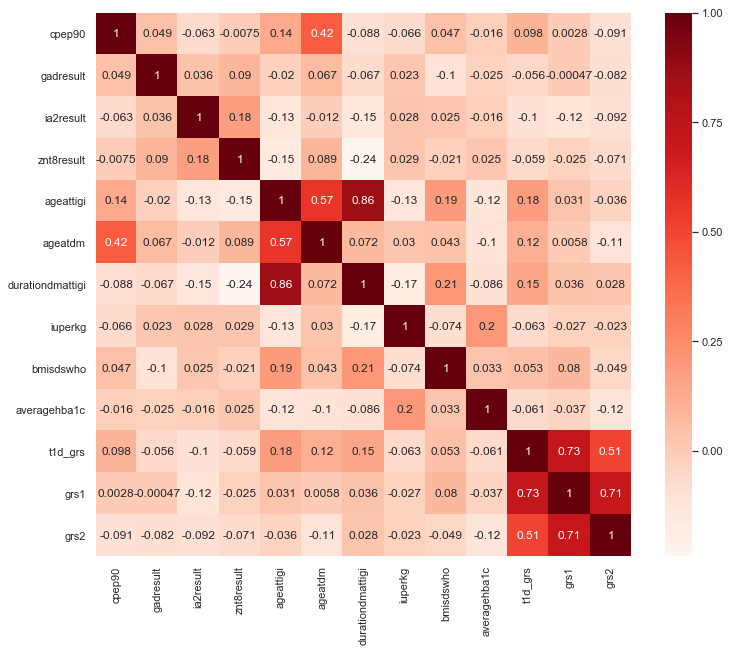

In [29]:
#datasubset correlation heat map
plt.figure(figsize=(12,10))
cor = datasubset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("heatmap.png")

C:\Users\Goncalo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


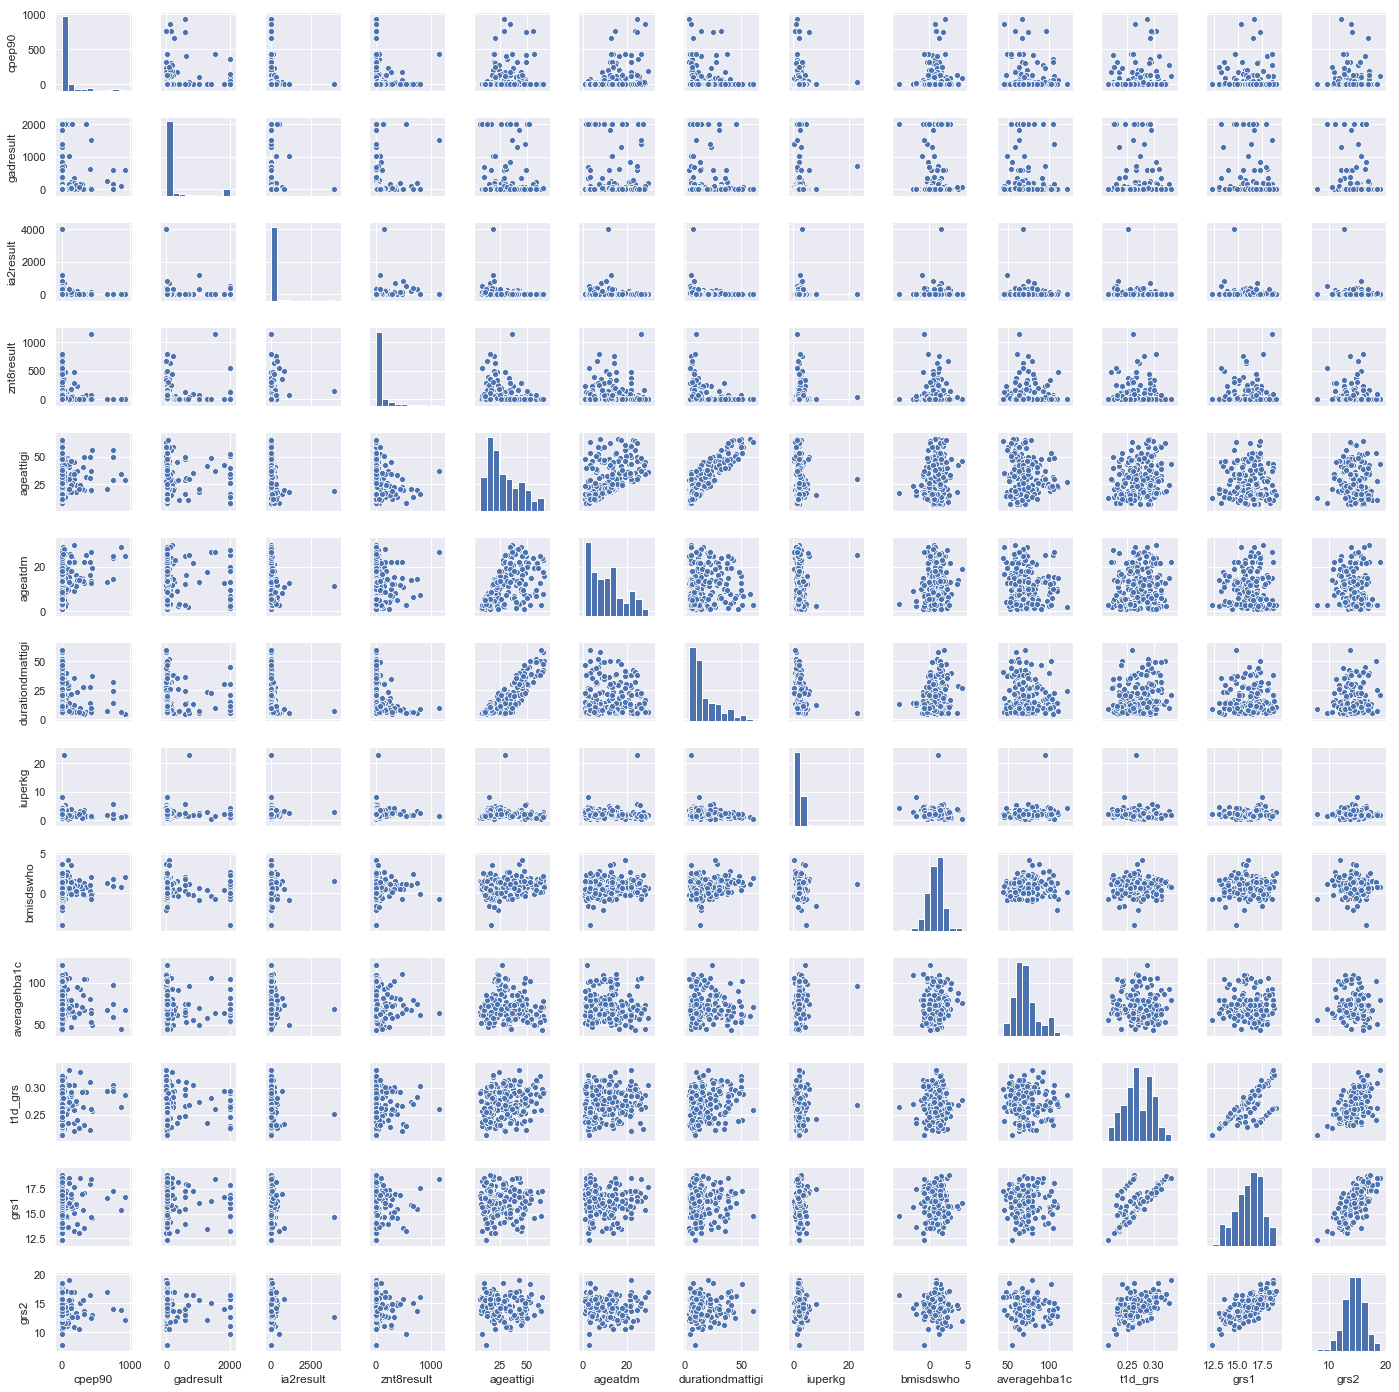

In [30]:
#scatterplot matrix with the most important variables
sns.set()
cols = ["cpep90", "gadresult", "ia2result", "znt8result", "ageattigi", "ageatdm", "durationdmattigi", "iuperkg", "bmisdswho", "averagehba1c", "t1d_grs", "grs1", "grs2"]
sns.pairplot(data[cols], size = 1.5)
plt.show();

In [31]:
data[cols].head()

,cpep90,gadresult,ia2result,znt8result,ageattigi,ageatdm,durationdmattigi,iuperkg,bmisdswho,averagehba1c,t1d_grs,grs1,grs2
0,2.9,93.500,0.000,0.0,23.747223,8.000000,15.747222,1.114783,1.450648,65.0,0.241976,NaN,NaN
1,2.9,212.648,51.765,21.0,59.016666,21.250000,37.766666,1.564802,0.556592,50.0,0.271098,NaN,NaN
3,324.0,0.000,0.000,0.0,49.530556,21.916666,27.613890,1.349714,1.231152,67.0,0.294175,17.059999,13.7521
4,756.0,144.800,0.000,0.0,55.919445,24.000000,31.919445,0.826780,0.802923,59.0,0.304296,NaN,NaN
6,437.0,12.400,0.000,0.0,56.566666,19.166666,37.400002,1.100586,-0.174720,49.0,0.257755,14.592700,12.9513


In [32]:
#subset with cpep and snps
datasnps = data[["cpep90", "rs2187668", "rs7454108", "rs10509540", "rs11594656", "rs11755527", "rs1264813", "rs12708716", "rs12722495", "rs1465788", "rs17574546", "rs1893217", "rs1990760", "rs2069762", "rs2281808", "rs2292239", "rs2395029", "rs2476601", "rs3024505", "rs3087243", "rs3129889", "rs3184504", "rs333", "rs3788013", "rs3825932", "rs425105", "rs478582", "rs4788084", "rs4948088", "rs5753037", "rs689", "rs7202877", "rs763361", "rs9388489", "DR15", "DR3DR4het"]]
datasnps.head()

,cpep90,rs2187668,rs7454108,rs10509540,rs11594656,rs11755527,rs1264813,rs12708716,rs12722495,rs1465788,rs17574546,rs1893217,rs1990760,rs2069762,rs2281808,rs2292239,rs2395029,rs2476601,rs3024505,rs3087243,rs3129889,rs3184504,rs333,rs3788013,rs3825932,rs425105,rs478582,rs4788084,rs4948088,rs5753037,rs689,rs7202877,rs763361,rs9388489,DR15,DR3DR4het
0,2.9,0.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0
1,2.9,0.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0
3,324.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,756.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,NaN,2.0,NaN,NaN,0.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0
6,437.0,0.0,1.0,2.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


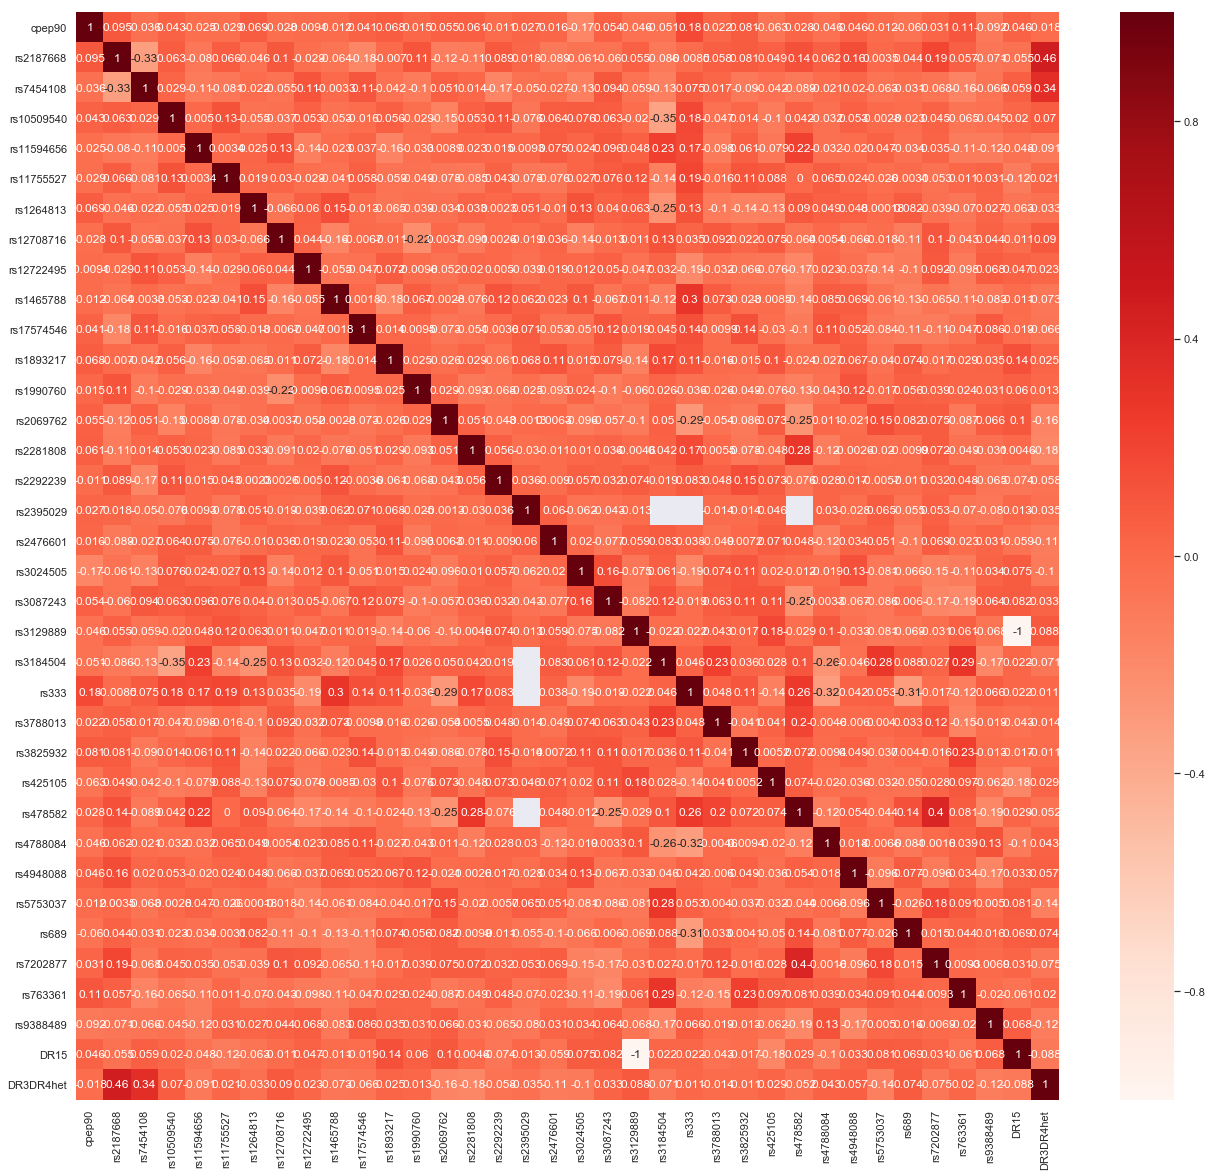

In [33]:
#datasubset correlation heat map
plt.figure(figsize=(22,20))
cor = datasnps.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [34]:
datasubset.head()

,cpep90,gender,gadresult,ia2result,znt8result,ageattigi,ageatdm,durationdmattigi,iuperkg,bmisdswho,averagehba1c,t1d_grs,familyhistoryofdm,grs1,grs2
0,2.9,Female,93.500,0.000,0.0,23.747223,8.000000,15.747222,1.114783,1.450648,65.0,0.241976,False,NaN,NaN
1,2.9,Male,212.648,51.765,21.0,59.016666,21.250000,37.766666,1.564802,0.556592,50.0,0.271098,True,NaN,NaN
3,324.0,Female,0.000,0.000,0.0,49.530556,21.916666,27.613890,1.349714,1.231152,67.0,0.294175,False,17.059999,13.7521
4,756.0,Female,144.800,0.000,0.0,55.919445,24.000000,31.919445,0.826780,0.802923,59.0,0.304296,True,NaN,NaN
6,437.0,Female,12.400,0.000,0.0,56.566666,19.166666,37.400002,1.100586,-0.174720,49.0,0.257755,False,14.592700,12.9513


In [35]:
# turn both categorical variables to binary
datasubset_dummies = pd.get_dummies(datasubset, columns=["gender", "familyhistoryofdm"], drop_first=True)
datasubset_dummies.head()

,cpep90,gadresult,ia2result,znt8result,ageattigi,ageatdm,durationdmattigi,iuperkg,bmisdswho,averagehba1c,t1d_grs,grs1,grs2,gender_Male,familyhistoryofdm_True
0,2.9,93.500,0.000,0.0,23.747223,8.000000,15.747222,1.114783,1.450648,65.0,0.241976,NaN,NaN,0,0
1,2.9,212.648,51.765,21.0,59.016666,21.250000,37.766666,1.564802,0.556592,50.0,0.271098,NaN,NaN,1,1
3,324.0,0.000,0.000,0.0,49.530556,21.916666,27.613890,1.349714,1.231152,67.0,0.294175,17.059999,13.7521,0,0
4,756.0,144.800,0.000,0.0,55.919445,24.000000,31.919445,0.826780,0.802923,59.0,0.304296,NaN,NaN,0,1
6,437.0,12.400,0.000,0.0,56.566666,19.166666,37.400002,1.100586,-0.174720,49.0,0.257755,14.592700,12.9513,0,0


In [36]:
#turning cpep90 to binary
datasubset_dummies.loc[datasubset_dummies["cpep90"] < 3, "cpep90"] = 0
datasubset_dummies.loc[datasubset_dummies["cpep90"] >= 3, "cpep90"] = 1

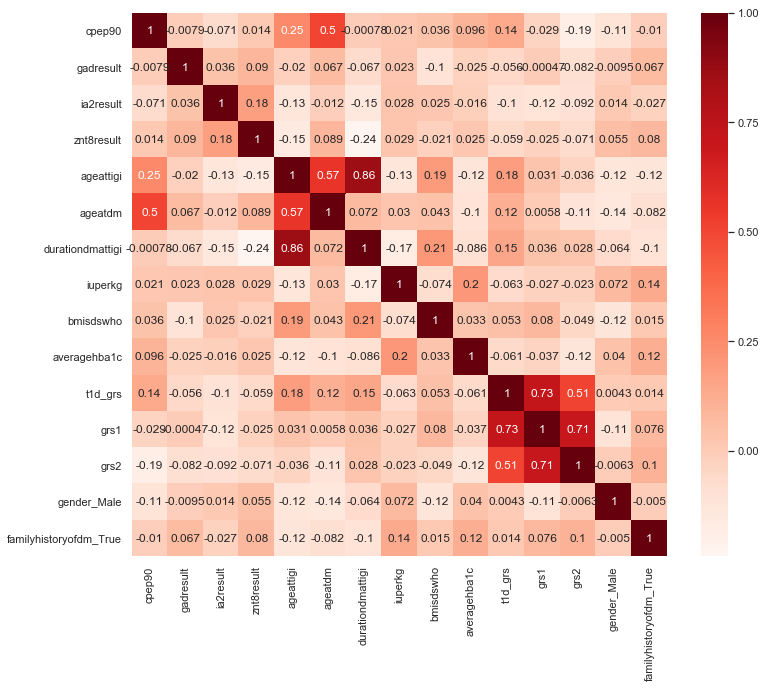

In [37]:
#datasubset_dummies correlation heat map
plt.figure(figsize=(12,10))
cor = datasubset_dummies.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('HeatHR.png',dpi=300)

            

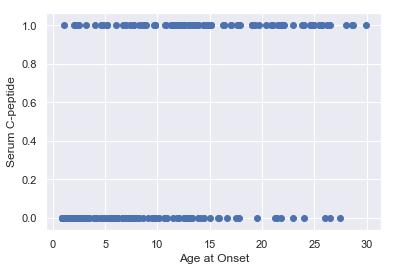

In [38]:
#scatter plot age/cpep90 with binary
y = datasubset_dummies["cpep90"];
x = datasubset_dummies["ageatdm"]
plt.scatter(x,y)
plt.xlabel("Age at Onset")
plt.ylabel("Serum C-peptide")
plt.savefig("scatter_cpepage.png")

In [39]:
datasubset_dummies.shape

(229, 15)

In [40]:
from featexp import get_univariate_plots


                                          Plots for ageatdm                                           


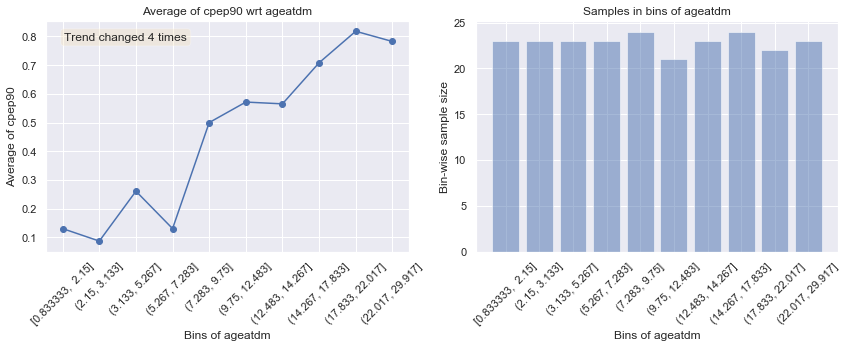

--------------------------------------------------------------------------------------------------------------




<Figure size 432x288 with 0 Axes>

In [41]:
# cpep and age at onset
univariate = get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["ageatdm"], bins=10)
plt.savefig('AgeAtdmHR',dpi=200)


                                         Plots for gadresult                                          


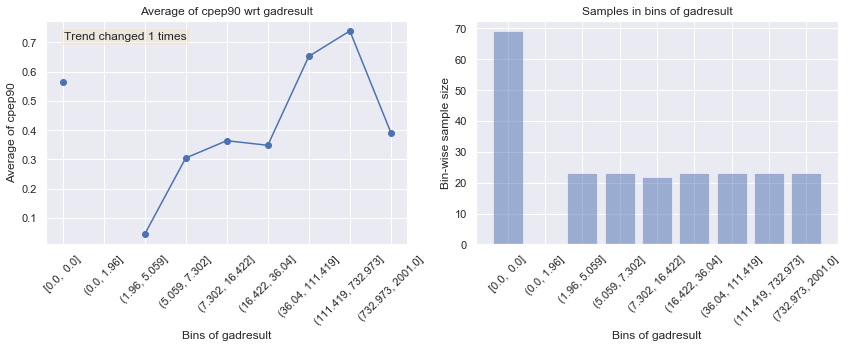

--------------------------------------------------------------------------------------------------------------




In [42]:
# cpep and gadresult
get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["gadresult"], bins=10)

                                         Plots for ia2result                                          


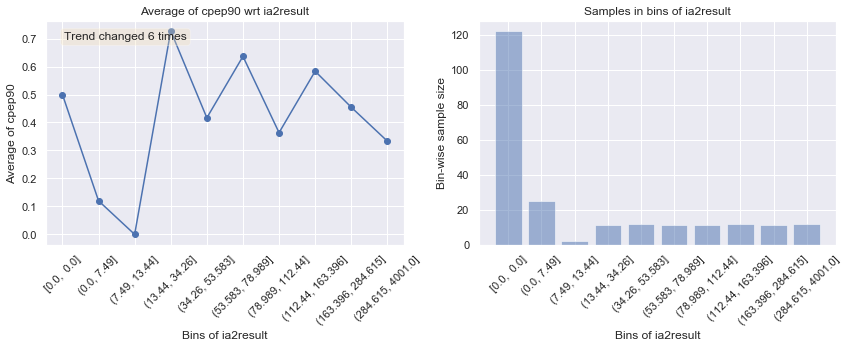

--------------------------------------------------------------------------------------------------------------




In [43]:
# cpep and ia2
get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["ia2result"], bins=20)

                                         Plots for znt8result                                         


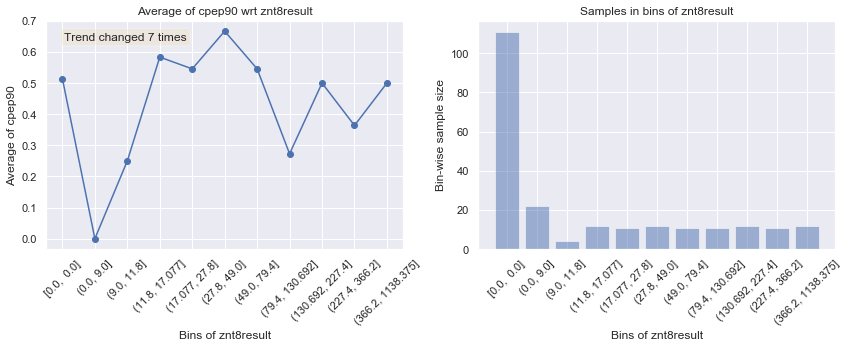

--------------------------------------------------------------------------------------------------------------




In [44]:
#cpep and znt8
get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["znt8result"], bins=20)

                                         Plots for ageattigi                                          


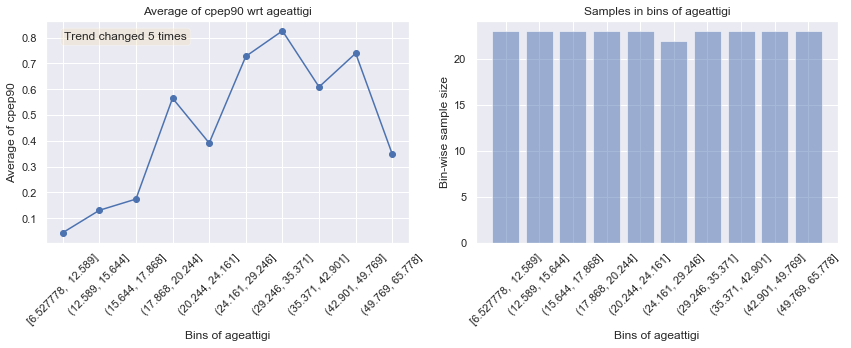

--------------------------------------------------------------------------------------------------------------




In [45]:
#cpep and ageattigi
get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["ageattigi"], bins=10)

                                      Plots for durationdmattigi                                      


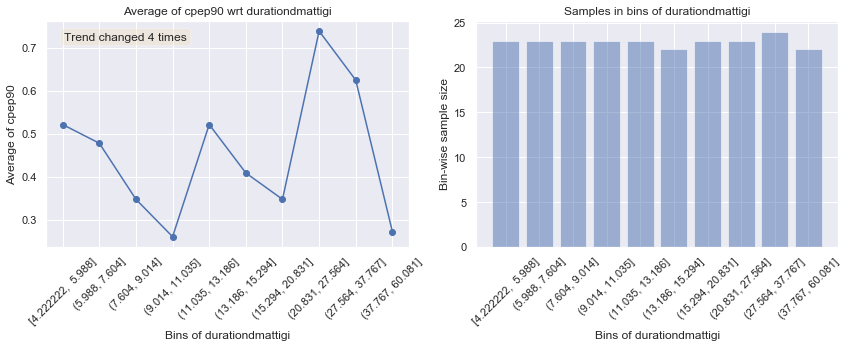

--------------------------------------------------------------------------------------------------------------




In [46]:
#cpep and duration of disease at tigi
get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["durationdmattigi"], bins=10)

                                          Plots for iuperkg                                           


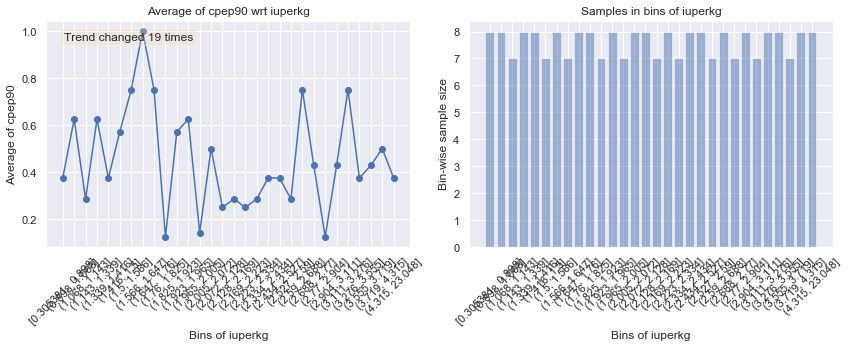

--------------------------------------------------------------------------------------------------------------




In [47]:
#cpep and insulin taken per kg
get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["iuperkg"], bins=30)

                                         Plots for bmisdswho                                          


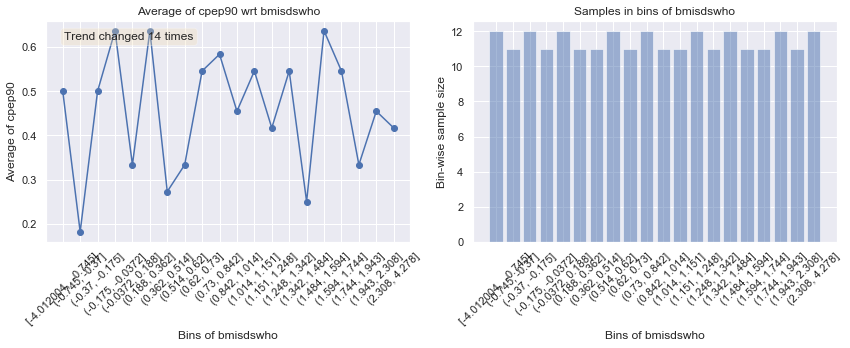

--------------------------------------------------------------------------------------------------------------




In [48]:
#cpep and bmi
get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["bmisdswho"], bins=20)

                                        Plots for averagehba1c                                        


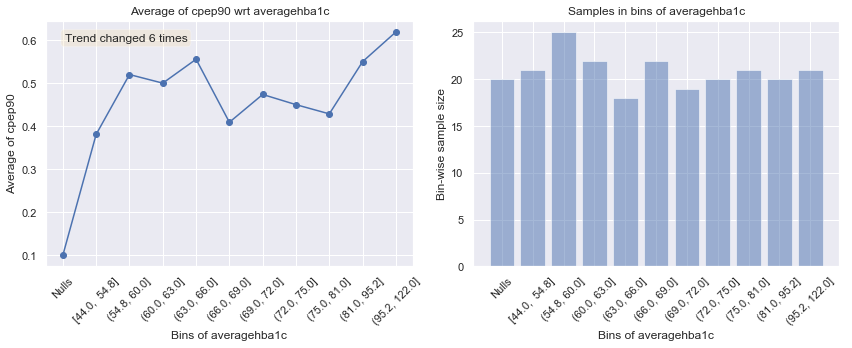

--------------------------------------------------------------------------------------------------------------




In [49]:
#cpep and hba1c
get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["averagehba1c"], bins=10)

                                            Plots for grs1                                            


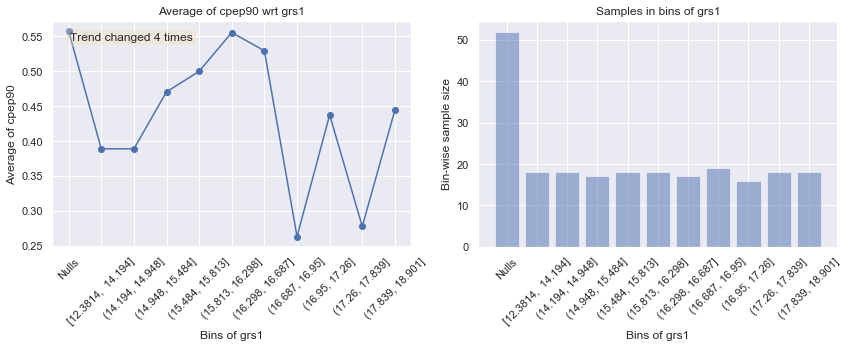

--------------------------------------------------------------------------------------------------------------




In [50]:
#cpep and grs1
get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["grs1"], bins=10)

                                            Plots for grs2                                            


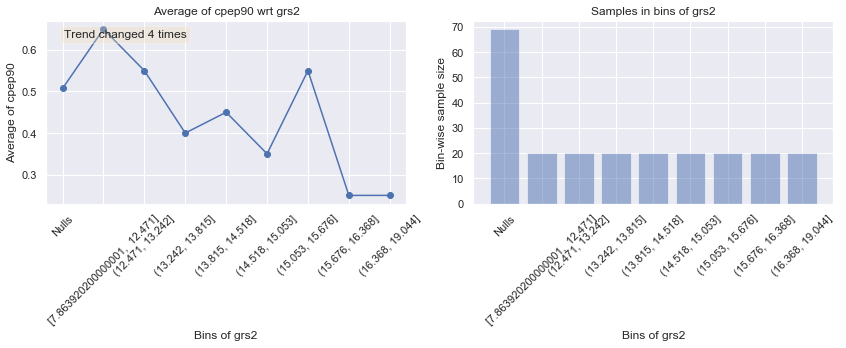

--------------------------------------------------------------------------------------------------------------




<Figure size 432x288 with 0 Axes>

In [51]:
#cpep and grs2
get_univariate_plots(data=datasubset_dummies, target_col="cpep90",
                     features_list=["grs2"], bins=8)
plt.savefig('grs2HR.png',dpi=300)

In [52]:
# dropping averagehba1c, t1d_grs, grs1 #they are correlated with grs2 and ages
datasubset_dummies.drop(["averagehba1c", "t1d_grs", "grs1","ageattigi","durationdmattigi"], axis=1, inplace=True)

In [53]:
#reset index
datasubset_dummies = datasubset_dummies.dropna()
datasubset_dummies = datasubset_dummies.reset_index(drop=True)

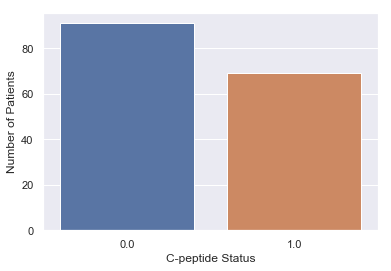

In [54]:
#high vs low cpeptide secretors
ax=sns.countplot(datasubset_dummies['cpep90'])
ax.set(xlabel="C-peptide Status", ylabel="Number of Patients")
plt.savefig('numPatients.png',dpi=300)

In [55]:
datasubset_dummies.shape

(160, 10)

In [56]:
datasubset_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
cpep90                    160 non-null float64
gadresult                 160 non-null float64
ia2result                 160 non-null float64
znt8result                160 non-null float64
ageatdm                   160 non-null float64
iuperkg                   160 non-null float64
bmisdswho                 160 non-null float64
grs2                      160 non-null float64
gender_Male               160 non-null uint8
familyhistoryofdm_True    160 non-null uint8
dtypes: float64(8), uint8(2)
memory usage: 10.4 KB


In [57]:
#missing values for datasubset
datasubset_dummies.isnull().sum()

cpep90                    0
gadresult                 0
ia2result                 0
znt8result                0
ageatdm                   0
iuperkg                   0
bmisdswho                 0
grs2                      0
gender_Male               0
familyhistoryofdm_True    0
dtype: int64

In [58]:
#number of high/low cpeptide secretors
datasubset_dummies["cpep90"].value_counts()

0.0    91
1.0    69
Name: cpep90, dtype: int64

In [106]:
datasubset_dummies["grs2"].describe()

count    160.000000
mean      14.417737
std        1.817733
min        7.863920
25%       13.242475
50%       14.518050
75%       15.676175
max       19.044399
Name: grs2, dtype: float64

In [107]:
datasubset_dummies["ageatdm"].describe()

count    160.000000
mean      10.099479
std        7.335480
min        0.833333
25%        3.312500
50%        8.625000
75%       14.375000
max       29.916666
Name: ageatdm, dtype: float64

In [59]:
#separate cpep90 from feature variables
X = datasubset_dummies.drop("cpep90", axis=1)
y = datasubset_dummies["cpep90"]

In [60]:
#standard scaling to get optimized results
sc = StandardScaler()
X =  sc.fit_transform(X)

C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [62]:
#scikit-learn, in calssification problems, used stratified k-fold cross-validation
#stratified cv splits the data such that the proportions between classes are the same in each fold as they are in the whole data set


In [63]:
#Logistic Regression
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-validation scores: [0.60606061 0.875      0.78125    0.9375     0.64516129]


C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
#Accuracy Logistic Regression
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.26)


In [65]:
#ROC AUC LR
ScoreAUC = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='roc_auc')

C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [66]:
print("Cross-validation scores: {}".format(ScoreAUC))

Cross-validation scores: [0.73308271 0.88095238 0.74603175 0.96031746 0.77777778]


In [67]:
print("Roc AUC: %0.2F (+/- %0.2f)" % (ScoreAUC.mean(), ScoreAUC.std() * 2))

Roc AUC: 0.82 (+/- 0.17)


In [68]:
#Random Forest Classifier
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross-validation scores: [0.54545455 0.84375    0.75       0.8125     0.64516129]


C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
#Accuracy Random Forest Classifier
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.22)


In [70]:
#ROC AUC RFC
scoreAuc =cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc')

C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\ensemble\forest

In [71]:
print("Cross-validation scores: {}".format(scoreAuc))

Cross-validation scores: [0.7387218  0.82539683 0.74801587 0.77380952 0.73076923]


In [72]:
print("Roc AUC: %0.2f (+/- %0.2f)" % (scoreAuc.mean(), scoreAuc.std() * 2))

Roc AUC: 0.76 (+/- 0.07)


In [73]:
#KNeighbors Classifier
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.63636364 0.78125    0.65625    0.625      0.64516129]


In [74]:
#Accuracy KNeighbors Classifier
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.11)


In [75]:
#AUC KNeighbors
ScoreAuC = cross_val_score(KNeighborsClassifier(), X, y, cv=5, scoring='roc_auc')

In [76]:
print("Cross-validation scores: {}".format(ScoreAuC))

Cross-validation scores: [0.62781955 0.7718254  0.625      0.76984127 0.61324786]


In [77]:
print("Roc AUC: %0.2f (+/- %0.2f)" % (ScoreAuC.mean(), ScoreAuC.std() * 2))

Roc AUC: 0.68 (+/- 0.15)


In [78]:
# Decision Tree Classifier
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.66666667 0.75       0.65625    0.59375    0.74193548]


In [79]:
# Accuracy Decision Tree Classifier
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.12)


In [80]:
#AUC Decision tree
SCOREauc= cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='roc_auc')

In [81]:
print("Cross-validation scores: {}".format(SCOREauc))

Cross-validation scores: [0.64661654 0.68253968 0.6547619  0.53968254 0.56410256]


In [82]:
print("Roc AUC: %0.2f (+/- %0.2f)" % (SCOREauc.mean(), SCOREauc.std() * 2))

Roc AUC: 0.62 (+/- 0.11)


In [83]:
# search for an optimal value of K for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
print (k_scores)

[0.6429901960784313, 0.6304901960784314, 0.6301225490196078, 0.6372058823529411, 0.6438235294117647, 0.6246078431372549, 0.655906862745098, 0.6242401960784314, 0.6238725490196078, 0.6179901960784313, 0.623921568627451, 0.6555882352941176, 0.6680882352941176, 0.6743382352941176, 0.6618382352941177, 0.6739705882352941, 0.6618382352941177, 0.6805882352941176, 0.6563235294117646, 0.6997058823529411, 0.7063725490196078, 0.6934558823529411, 0.6879411764705882, 0.6989705882352941, 0.692720588235294, 0.692720588235294, 0.6802205882352941, 0.6868872549019608, 0.6856862745098039, 0.6986029411764705]


Text(0, 0.5, 'Cross-Validated Accuracy')

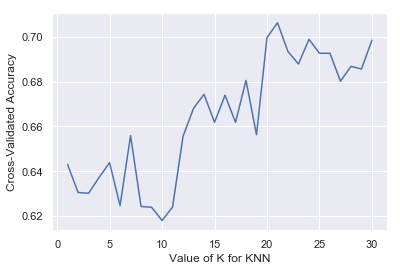

In [84]:
#plot the value of K for KNN (x axis) versus the cross validated accuracy
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

In [85]:
datasubset_dummies.head()

,cpep90,gadresult,ia2result,znt8result,ageatdm,iuperkg,bmisdswho,grs2,gender_Male,familyhistoryofdm_True
0,1.0,0.0,0.0,0.0,21.916666,1.349714,1.231152,13.7521,0,0
1,1.0,12.4,0.0,0.0,19.166666,1.100586,-0.174720,12.9513,0,0
2,1.0,0.0,83.2,76.0,14.833333,0.914599,1.972678,15.2009,0,1
3,1.0,346.9,0.0,0.0,8.916667,1.536000,1.543202,12.6084,0,0
4,1.0,63.5,0.0,0.0,10.833333,2.436945,-0.305257,13.2140,0,0


In [86]:
datasubset_dummies.describe()

,cpep90,gadresult,ia2result,znt8result,ageatdm,iuperkg,bmisdswho,grs2,gender_Male,familyhistoryofdm_True
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000
mean,0.431250,187.353113,74.686400,60.300481,10.099479,2.365127,0.924258,14.417737,0.50000,0.506250
std,0.496806,489.279376,330.605326,137.582623,7.335480,1.059698,1.074975,1.817733,0.50157,0.501531
min,0.000000,0.000000,0.000000,0.000000,0.833333,0.305381,-4.012004,7.863920,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.312500,1.761633,0.312827,13.242475,0.00000,0.000000
50%,0.000000,5.987000,0.000000,0.000000,8.625000,2.167871,1.036393,14.518050,0.50000,1.000000
75%,1.000000,40.952250,48.337750,35.231750,14.375000,2.812594,1.546410,15.676175,1.00000,1.000000
max,1.000000,2001.000000,4001.000000,800.000000,29.916666,8.222461,4.277689,19.044399,1.00000,1.000000


In [87]:
import statsmodels.formula.api as smf

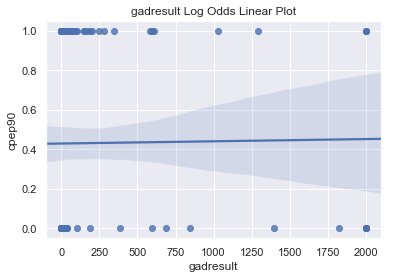

In [88]:
#checking assumption of continuous IVs being linearly related to the log odds
gadresult = sns.regplot(x= 'gadresult', y= 'cpep90', data= datasubset_dummies, logistic= True).set_title("gadresult Log Odds Linear Plot")
gadresult.figure.savefig("gadresult log lin.png")

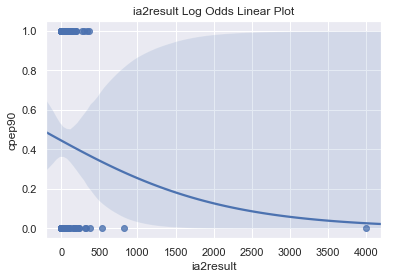

In [89]:
ia2result = sns.regplot(x= 'ia2result', y= 'cpep90', data= datasubset_dummies, logistic= True).set_title("ia2result Log Odds Linear Plot")
ia2result.figure.savefig("ia2result log lin.png")

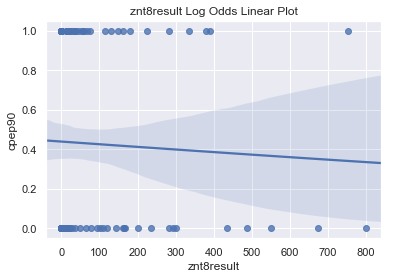

In [90]:
znt8result = sns.regplot(x= 'znt8result', y= 'cpep90', data= datasubset_dummies, logistic= True).set_title("znt8result Log Odds Linear Plot")
znt8result.figure.savefig("znt8result log lin.png")

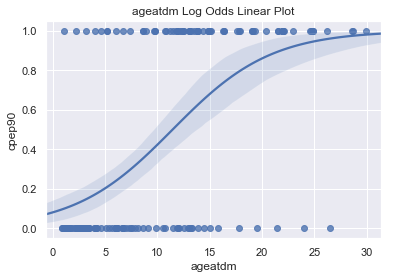

In [91]:
ageatdm = sns.regplot(x= 'ageatdm', y= 'cpep90', data= datasubset_dummies, logistic= True).set_title("ageatdm Log Odds Linear Plot")
ageatdm.figure.savefig("ageatdm log lin.png")

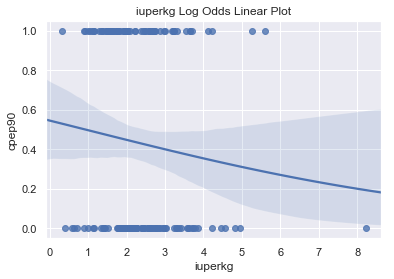

In [92]:
iuperkg = sns.regplot(x= 'iuperkg', y= 'cpep90', data= datasubset_dummies, logistic= True).set_title("iuperkg Log Odds Linear Plot")
iuperkg.figure.savefig("iuperkg log lin.png")

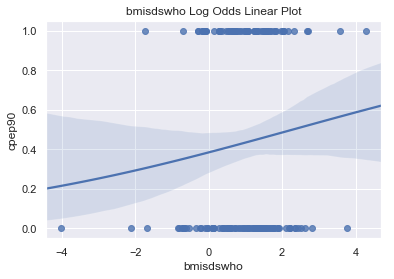

In [93]:
bmisdswho = sns.regplot(x= 'bmisdswho', y= 'cpep90', data= datasubset_dummies, logistic= True).set_title("bmisdswho Log Odds Linear Plot")
bmisdswho.figure.savefig("bmisdswho log lin.png")

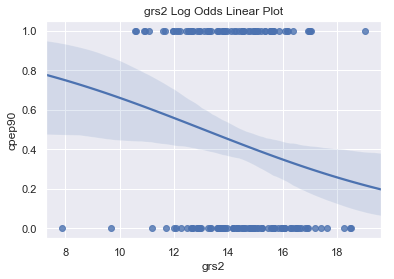

In [94]:
grs2 = sns.regplot(x= 'grs2', y= 'cpep90', data= datasubset_dummies, logistic= True).set_title("grs2 Log Odds Linear Plot")
grs2.figure.savefig("grs2 log lin.png")

In [95]:
datasubset_dummies.corr()

,cpep90,gadresult,ia2result,znt8result,ageatdm,iuperkg,bmisdswho,grs2,gender_Male,familyhistoryofdm_True
cpep90,1.000000,0.011104,-0.075830,-0.036493,0.571902,-0.097820,0.105957,-0.186899,-0.113579,-0.048748
gadresult,0.011104,1.000000,0.012283,0.024662,0.018627,-0.087844,-0.081507,-0.082212,0.014490,-0.022525
ia2result,-0.075830,0.012283,1.000000,0.208697,0.007676,0.048236,0.056855,-0.092246,-0.028927,-0.056118
znt8result,-0.036493,0.024662,0.208697,1.000000,0.022722,0.085535,0.037496,-0.070572,0.070959,0.079129
ageatdm,0.571902,0.018627,0.007676,0.022722,1.000000,-0.060599,0.007312,-0.110895,-0.116310,-0.124610
iuperkg,-0.097820,-0.087844,0.048236,0.085535,-0.060599,1.000000,-0.222983,-0.023012,0.211505,0.154901
bmisdswho,0.105957,-0.081507,0.056855,0.037496,0.007312,-0.222983,1.000000,-0.049029,-0.118721,0.062108
grs2,-0.186899,-0.082212,-0.092246,-0.070572,-0.110895,-0.023012,-0.049029,1.000000,-0.006255,0.104455
gender_Male,-0.113579,0.014490,-0.028927,0.070959,-0.116310,0.211505,-0.118721,-0.006255,1.000000,0.087507
familyhistoryofdm_True,-0.048748,-0.022525,-0.056118,0.079129,-0.124610,0.154901,0.062108,0.104455,0.087507,1.000000


Text(0.5, 1.0, 'Gadresult Box Plot')

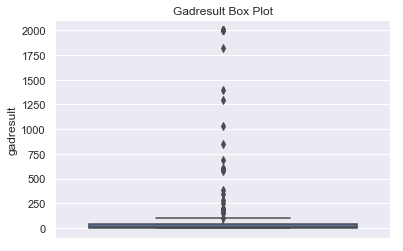

In [96]:
sns.boxplot(x= 'gadresult', data= datasubset_dummies, orient= 'v').set_title("Gadresult Box Plot")

Text(0.5, 1.0, 'ia2result Box Plot')

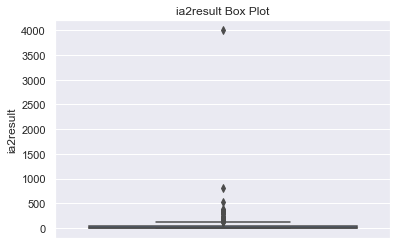

In [97]:
sns.boxplot(x= 'ia2result', data= datasubset_dummies, orient= 'v').set_title("ia2result Box Plot")

In [98]:
# Logistic regrassion model
model= smf.logit(formula="cpep90~ gadresult + ia2result + znt8result + ageatdm + iuperkg + bmisdswho + grs2 + gender_Male + familyhistoryofdm_True ", data= datasubset_dummies).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.470197
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cpep90   No. Observations:                  160
Model:                          Logit   Df Residuals:                      150
Method:                           MLE   Df Model:                            9
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                  0.3122
Time:                        09:00:30   Log-Likelihood:                -75.232
converged:                       True   LL-Null:                       -109.39
                                        LLR p-value:                 3.263e-11
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.1866      1.857      0.639      0.523      -2.452       4.825
gadresult                 -0.0001      0.000     -0.253      0.800      -0.001       0.001
ia2result                 -0.0008      0.001     -0.815      0.415      -0.003       0.001
znt8result                -0.0007      0.002     -0.452      0.652      -0.004       0.002
ageatdm                    0.2142      0.036      5.979      0.000       0.144       0.284
iuperkg                   -0.1973      0.237     -0.834      0.405      -0.661       0.267
bmisdswho                  0.2568      0.211      1.215      0.224      -0.157       0.671
grs2                      -0.2303      0.118     -1.951      0.051      -0.462       0.001
gender_Male               -0.1925      0.423     -0.455      0.649      -1.022       0.637
familyhistoryofdm_True     0.1726      0.421      0.410      0.682      -0.652       0.997
==========================================================================================
"""

In [99]:
X = datasubset_dummies.drop("cpep90", axis=1)

In [100]:
# dropping
X.drop(["gadresult", "ia2result", "znt8result","iuperkg","bmisdswho","gender_Male", "familyhistoryofdm_True"], axis=1, inplace=True)

In [101]:
cross_val_score(LogisticRegression(), X, y, cv=5, scoring='roc_auc').mean()

C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Goncalo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

0.838063106484159

In [102]:
# Logistic regression model
model= smf.logit(formula="cpep90~ ageatdm + grs2", data= datasubset_dummies).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.487818
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cpep90   No. Observations:                  160
Model:                          Logit   Df Residuals:                      157
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                  0.2865
Time:                        09:00:31   Log-Likelihood:                -78.051
converged:                       True   LL-Null:                       -109.39
                                        LLR p-value:                 2.462e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4356      1.631      0.267      0.789      -2.762       3.633
ageatdm        0.2089      0.035      6.046      0.000       0.141       0.277
grs2          -0.1989      0.112     -1.771      0.077      -0.419       0.021
==============================================================================
"""

In [103]:
#getting the odds ratios, z-value, and 95% CI
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds

,OR,z-value,2.5%,97.5%
Intercept,1.545881,7.894624e-01,0.063174,37.827960
ageatdm,1.232274,1.482559e-09,1.151605,1.318594
grs2,0.819620,7.656006e-02,0.657669,1.021450
